- In this notebook we explore the eco-friendliness of products in terms of labels ! We will see there are many different labels and we will try to wrangle our way around those labels and see if we can reach any interesting conclusions

In [2]:
import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

In [3]:
DATAPATH = 'data/'

In [4]:
data = pd.read_csv(DATAPATH+'labels.csv',delimiter=',',low_memory=False)
data.set_index('code',inplace=True)
data.shape

(99655, 3)

In [78]:
data_total = pd.read_csv(DATAPATH+'cleaned_unique_index.csv',delimiter=',',low_memory=False)
data_total.set_index('code',inplace=True)

In [6]:
data.head()

,labels,labels_tags,labels_en
code,,,
0000000020114,Fabriqué en France,en:made-in-france,Made in France
0000000274722,"Viande Française,Fabriqué en France","fr:viande-francaise,en:made-in-france","fr:Viande Française,Made in France"
0000003444009,Contient des OGM,en:contains-gmos,Contains GMOs
0000005200016,AB,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,fr:AB Agriculture Biologique"
0000007020254,"Kascher,Contient des OGM","en:kosher,en:contains-gmos","Kosher,Contains GMOs"


In [7]:
# We do a 'flatmap' trick...
label_flatted = data["labels_en"].str.split(',').apply(pd.Series).unstack().dropna().to_frame()
label_flatted.columns = ["labels"]
label_flatted = label_flatted.reset_index().set_index("code")
label_flatted = label_flatted[["labels"]]
label_flatted.head()

0
   code                                          
0  0000000020114                   Made in France
   0000000274722              fr:Viande Française
   0000003444009                    Contains GMOs
   0000005200016                          Organic
   0000007020254                           Kosher
   0000007730009                        Green Dot
   0000007933929                    Contains GMOs
   0000009125124                        Green Dot
   0000009336247            No artificial flavors
   0000010206515                      Gluten-free
   0000012345878          Incorrect data on label
   0000020004552  Not advised for specific people
   0000020424640              Sustainable farming
   0000030053014                  Low or no sugar
   0000034054086                    Contains GMOs
   0000040144078                    Contains GMOs
   0000050157846                       Vegetarian
   0000084154071                       Vegetarian
   0000087157635                 No preservatives
   0000101209159                    Palm oil free
   000030                               Green Dot
   000031                               Green Dot
   000039365                           Vegetarian
   000039681                           Vegetarian
   0000460938714                       Vegetarian
   000050                               Green Dot
   000051                               Green Dot
   00005401                               Organic
   0001126220                           Green Dot
   00011501                            Point-vert
...                                           ...
20 3392780007001                 Carbon footprint
   3664037000012                       No lactose
   3664037000029                          No GMOs
   3700067371248                        fr:Triman
   3700214610046                 Carbon footprint
   5054269137583                             Salt
   8412800005888                 Vitamin D source
   8412800005895                 Vitamin D source
   8412800005901      es:Bajo-en-grasas-saturadas
21 3392780002648                 Carbon footprint
   3392780007001                 Carbon footprint
   3664037000012                          No milk
   3664037000029                       No lactose
   3700214610046                 Carbon footprint
   5054269137583                  Tartaric-acid-l
   8412800005888      es:Bajo-en-grasas-saturadas
   8412800005895      es:Bajo-en-grasas-saturadas
22 3392780002648                 Carbon footprint
   3392780007001                 Carbon footprint
   3664037000012     fr:AB Agriculture Biologique
   3664037000029                The Vegan Society
   3700214610046                 Carbon footprint
   5054269137583                          Thiamin
23 3392780002648                 Carbon footprint
   3392780007001                 Carbon footprint
   3664037000029     fr:AB Agriculture Biologique
   5054269137583            Thickener-xanthan-gum
24 5054269137583                            Water
25 5054269137583          Wheat-flour-wheat-flour
26 5054269137583                            Yeast

[261459 rows x 1 columns]

In [9]:
organic = label_flatted[label_flatted["labels"].str.contains("Organic")]
organic = organic[~organic.index.duplicated()] ## We don't want to many. 


In [11]:
cnt_organic = organic.shape[0]
total_cnt = data_total.shape[0]
percentage = cnt_organic / total_cnt
print("There are %d articles with label organic" % cnt_organic)
print("This represents %f %% of articles " % percentage)

There are 37395 articles with label organic
This represents 0.056175 % of articles 


In [12]:
bio = label_flatted[label_flatted["labels"].str.contains("Bio")]
bio = bio[~bio.index.duplicated()] ## We don't want to many. 
bio

,labels
code,
0018627740001,Bio
0221109418736,it:Bio
02516101,fr:Biogroupe
0621456277183,fr:Biologique-avec-legumes
11044204,fr:Bio7
11304915,Bio
13294803,Bio
15667496,fr:Bio-organic
2000000020926,Bio


In [13]:
cnt_organic = organic.shape[0]
cnt_bio = bio.shape[0]
total_cnt = data_total.shape[0]
percentage_organic = cnt_organic / total_cnt
percentage_bio = cnt_bio / total_cnt
print("There are %d articles with label organic" % cnt_organic)
print("This represents %f %% of articles " % percentage_organic)
print("There are %d articles with label bio" % cnt_bio)
print("This represents %f %% of articles " % percentage_bio)

There are 37395 articles with label organic
This represents 0.056175 % of articles 
There are 13886 articles with label bio
This represents 0.020859 % of articles 


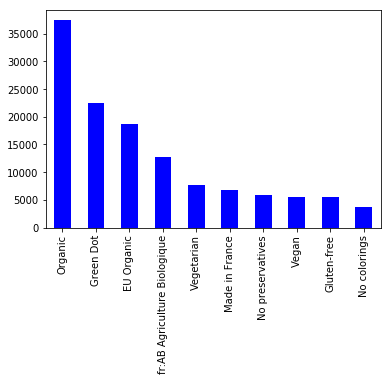

In [14]:
label_flatted["labels"].value_counts().nlargest(10).plot.bar(color='b')
plt.show()

- We can see that the most popular label is organic, there are also a lot of articles having the green dot label which is depicted below for people who do not know what it is. 
- In order here are the most popular labels, unfortunately having an organic label is not a real label. It is a wide concept. Agriculture biologique is a french label. 
<img src="img/eu_organic.jpg" alt="EU Organic">
<img src="img/green_dot.svg" alt="Green Dot">
<img src="img/agri_bio.png" alt="Agriculture biologique">


- We now focus on those three mentionned label to see where we can find them most. 


In [61]:
top_4 = label_flatted["labels"].value_counts().nlargest(4)
top_4 = list(top_4.index)
top_4_articles = label_flatted[label_flatted["labels"].apply(lambda r : r in top_4)]

In [95]:
top_4_all = top_4_articles.join(data_total["origins"], how="inner",lsuffix="l",rsuffix="r").dropna(subset=["origins"])
top_4_all.head()

,labels,origins
code,,
00028202,Green Dot,Royaume-Uni
00035460,Green Dot,Vietnam
00042611,Organic,?
00042611,EU Organic,?
00042611,fr:AB Agriculture Biologique,?


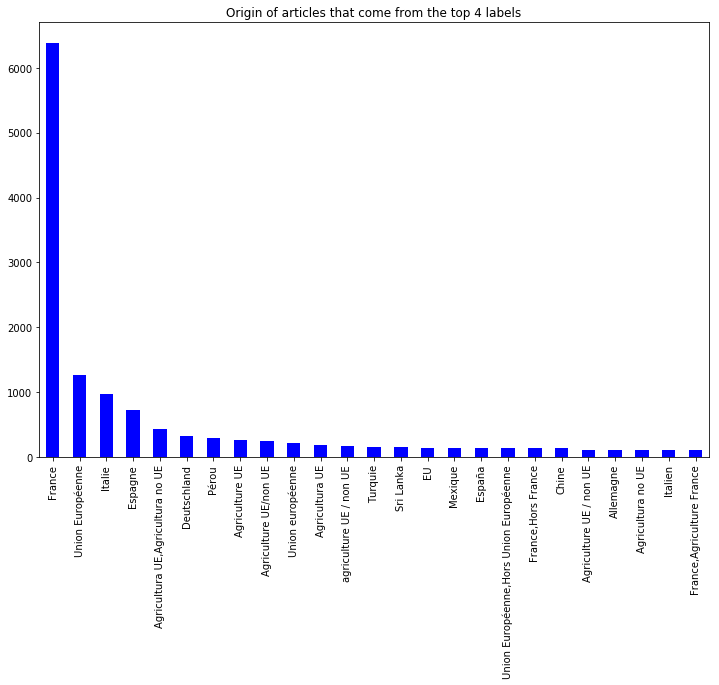

In [94]:
top_4_all["origins"].value_counts().nlargest(25).plot.bar(figsize=(12,8),title="Origin of articles that come from the top 4 labels",color='b')

- We can see that most products come from France however there are a number of articles that come way further than france, it will be interesting to see to study where they are being sold, but this will be done in depth in an other study. 